# Using Pandas in Python

## Pandas

Pandas is used for data maniplution and analysis. It is build on the NumPy package and provides an important data structure 'DataFrame'. The DataFrame has rows and columns, similar to a table, where the Pandas can basically read data (from sources such as a CSV file) and fill up the rows and columns. In short, the DataFrame is essentially a spreadsheet in code.

Each column is a `pandas.Series` object and can only hold one data type. Therefore, unlike a two dimensional NumPy array, a DataFrame can contain different data types using multiple `pandas.Series` object.

The DataFrame data structure will be easier to work with than through the use of loops and list/dictionary in Python.

### Creating a DataFrame

We will create a DataFrame from a Dictionary, where each key is the label for each column and the values of the key are the column data.

In [ ]:
import pandas as pd

dict = {"student": ["John", "Rosie", "Ah Hock", "Siti", "Bala"],
       "age": [18, 21, 19, 18, 20],
       "town": ["Ang Mo Kio", "Yishun", "Toa Payoh", "Clementi", "Tampines"],
       "grade": [2.4, 3.4, 2.7, 3.7, 3.2] }

class_grades = pd.DataFrame(dict)
print(class_grades)

   student  age        town  grade
0     John   18  Ang Mo Kio    2.4
1    Rosie   21      Yishun    3.4
2  Ah Hock   19   Toa Payoh    2.7
3     Siti   18    Clementi    3.7
4     Bala   20    Tampines    3.2


The index are automatically given numbers from 0 to 4. These can be changed as follows

In [ ]:
class_grades.index = ["JN", "RS", "AH", "ST", "BL"]

print(class_grades)

    student  age        town  grade
JN     John   18  Ang Mo Kio    2.4
RS    Rosie   21      Yishun    3.4
AH  Ah Hock   19   Toa Payoh    2.7
ST     Siti   18    Clementi    3.7
BL     Bala   20    Tampines    3.2


Accessing the values (list of students) within the dataframe. Recall that a list of students is essentially the **series or column** in the DataFrame

In [ ]:
class_grades['student']

JN       John
RS      Rosie
AH    Ah Hock
ST       Siti
BL       Bala
Name: student, dtype: object

Accessing via a single bracket will output a Pandas Series, while in the following example using a double bracket will output a DataFrame

In [ ]:
class_grades[['student']]

,student
JN,John
RS,Rosie
AH,Ah Hock
ST,Siti
BL,Bala


To access more series in a dataframe, simply add in the respective series you are interested in.

In [ ]:
class_grades[['student','town']]

,student,town
JN,John,Ang Mo Kio
RS,Rosie,Yishun
AH,Ah Hock,Toa Payoh
ST,Siti,Clementi
BL,Bala,Tampines


### Creating a DataFrame from a List of List

In [ ]:
student_list = [["Lee", "Jones", 10],
                ["Tan", "Shulin", 14],
                ["Hanson", "Chris", 13],
                ["Sharab", "Kumar", 12],
                ["Rajah", "Kathik", 13],
                ["See", "Jerry", 16],
                ["Kosnan", "Ali", 12]]

students = pd.DataFrame(student_list)
students

,0,1,2
0,Lee,Jones,10
1,Tan,Shulin,14
2,Hanson,Chris,13
3,Sharab,Kumar,12
4,Rajah,Kathik,13
5,See,Jerry,16
6,Kosnan,Ali,12


Since there is no column names, we could have added in the column names (and row index) explicitly using a list of strings




In [ ]:
columns = ['first','last','ages']
index = ['LJ','TS','HC','SK','RK','SJ','KA']

students = pd.DataFrame (student_list, columns=columns, index = index)
students

,first,last,ages
LJ,Lee,Jones,10
TS,Tan,Shulin,14
HC,Hanson,Chris,13
SK,Sharab,Kumar,12
RK,Rajah,Kathik,13
SJ,See,Jerry,16
KA,Kosnan,Ali,12


## Common DataFrame Operations

### Heads and Tails

Take a peek at the top or bottom of the data to better understand the data

In [ ]:
students.head()

,first,last,ages
LJ,Lee,Jones,10
TS,Tan,Shulin,14
HC,Hanson,Chris,13
SK,Sharab,Kumar,12
RK,Rajah,Kathik,13


In [ ]:
students.tail()

,first,last,ages
HC,Hanson,Chris,13
SK,Sharab,Kumar,12
RK,Rajah,Kathik,13
SJ,See,Jerry,16
KA,Kosnan,Ali,12


You can also specify the number of rows you wish to peek at.

`students.head(3)`

In [ ]:
students.head(3)

,first,last,ages
LJ,Lee,Jones,10
TS,Tan,Shulin,14
HC,Hanson,Chris,13


### Descriptive Statistics

Obtaining descriptive statistics about the data.

In [ ]:
students.describe()

,ages
count,7.000000
mean,12.857143
std,1.864454
min,10.000000
25%,12.000000
50%,13.000000
75%,13.500000
max,16.000000


The quantiles can be changed to your preferred values. (50% is inserted regardless of argument for percentiles)

In [ ]:
students.describe(percentiles=[0.1, 0.9])

,ages
count,7.000000
mean,12.857143
std,1.864454
min,10.000000
10%,11.200000
50%,13.000000
90%,14.800000
max,16.000000


Statistics for all columns can be obtained by using `all` as the argument for `include`.

In [ ]:
students.describe(include='all')

,first,last,ages
count,7,7,7.000000
unique,7,7,NaN
top,Lee,Jones,NaN
freq,1,1,NaN
mean,NaN,NaN,12.857143
std,NaN,NaN,1.864454
min,NaN,NaN,10.000000
25%,NaN,NaN,12.000000
50%,NaN,NaN,13.000000
75%,NaN,NaN,13.500000


### Accessing columns

Recall that a column can be accessed by using the column name in brackets students['ages']

In [ ]:
students['ages']

LJ    10
TS    14
HC    13
SK    12
RK    13
SJ    16
KA    12
Name: ages, dtype: int64

If the column name does not contain any special character or dashes and is not the same as an existing attribute of DataFrame (such as `first` or `last`), you can use the column name as an attribute

In [ ]:
students.ages

LJ    10
TS    14
HC    13
SK    12
RK    13
SJ    16
KA    12
Name: ages, dtype: int64

To access specific rows, you can use the row index or number

In [ ]:
students[1:3]

,first,last,ages
TS,Tan,Shulin,14
HC,Hanson,Chris,13


In [ ]:
students['TS':'SK']

,first,last,ages
TS,Tan,Shulin,14
HC,Hanson,Chris,13
SK,Sharab,Kumar,12


### Masking
Masking data is a very useful operation on DataFrame.

The mask is a list of Boolean values for each row. Set True for required rows and False for the others.

In [ ]:
mask = [True, False, True, False, True, False, True]
students[mask]

,first,last,ages
LJ,Lee,Jones,10
HC,Hanson,Chris,13
RK,Rajah,Kathik,13
KA,Kosnan,Ali,12


### loc and iloc
loc and iloc is the recommended way to perform data selection operation.

* loc is label-based. It requires the use of row and column labels.
* iloc is integer-based. It requires the index of the row and column.

In [ ]:
class_grades.loc['JN']

student          John
age                18
town       Ang Mo Kio
grade             2.4
Name: JN, dtype: object

In [ ]:
class_grades.loc['JN':'JN']

,student,age,town,grade
JN,John,18,Ang Mo Kio,2.4


In [ ]:
class_grades.loc[['JN','AH']]

,student,age,town,grade
JN,John,18,Ang Mo Kio,2.4
AH,Ah Hock,19,Toa Payoh,2.7


In [ ]:
class_grades.loc[['JN','AH'],['age','grade']]

,age,grade
JN,18,2.4
AH,19,2.7


In [ ]:
class_grades.iloc[[1,3]]

,student,age,town,grade
RS,Rosie,21,Yishun,3.4
ST,Siti,18,Clementi,3.7


In [ ]:
class_grades.iloc[[4],[0,1,3]]

,student,age,grade
BL,Bala,20,3.2


if you want to select only specific columns, you can use a mask too.

In [ ]:
mask = [True, True, False, False]
class_grades.iloc[[4], mask]

,student,age
BL,Bala,20


## Exercise

Try creating a dictionary of test scores (list) using the student's name as the key. Then try to create a dataframe using the dictionary you have just created.

Print out your created dataframe

| Student | Score 1 | Score 2 | Score 3 |
|---|---|---|---|
| John | 60 | 90 | 80 |
| Juliet | 40 | 58 | 70|
| Tommy | 70 | 65 | 68 |

In [ ]:
#todo: Exercise

import pandas as pd

test_dict = {'John':[60, 90, 80], 'Juliet':[40,58,70], 'Tommy':[70, 65, 68]}

df = pd.DataFrame(test_dict)

df

,John,Juliet,Tommy
0,60,40,70
1,90,58,65
2,80,70,68


-----

Depending on how you have created your dataframe, you may see the keys are listed as a column. The rows are labeled with indices starting at 0 by default.

Let's do a transpose to change the rows into columns and columns into rows.

In [ ]:
df = df.T
df

,0,1,2
John,60,90,80
Juliet,40,58,70
Tommy,70,65,68


Rename the columns to something more precise

In [ ]:
df.columns = ['test_1', 'test_2', 'test_3']
df

,test_1,test_2,test_3
John,60,90,80
Juliet,40,58,70
Tommy,70,65,68


Use iloc to acces the first row

In [ ]:
df.iloc[0]

test_1    60
test_2    90
test_3    80
Name: John, dtype: int64

## Exercise

Try to  access the values in the first column 'Test 1'

In [ ]:
#todo: Exercise

df['test_1']

#can also use the dot notation df.test_1

John      60
Juliet    40
Tommy     70
Name: test_1, dtype: int64

Limit the data of concern to only the first 2 tests.

In [ ]:
#todo: Exercise

df.iloc[:,0:2]

# can select by index too
# df.iloc[[0,1,2],[0,1]]

,test_1,test_2
John,60,90
Juliet,40,58
Tommy,70,65


### Using pandas to append more data (same columns different row data)

In [ ]:
#Define new dataframe
group_2_dict = {'May':[30, 45, 48], 'Jim':[77,89,80]}

df_new = pd.DataFrame(group_2_dict)
df_new = df_new.T
df_new.columns = ['test_1', 'test_2', 'test_3']
df_new

,test_1,test_2,test_3
May,30,45,48
Jim,77,89,80


In [ ]:
df_all = pd.concat([df, df_new])
df_all

,test_1,test_2,test_3
John,60,90,80
Juliet,40,58,70
Tommy,70,65,68
May,30,45,48
Jim,77,89,80


##### Note: we are not using default indexes in this case but using concat can cause duplicate indexes.

A simplefix would be to use
```df_new=df_new.reset_index (drop=True)```

Otherwise, we can use the `ignore_index` option in the `pd.concat()` function:
```df_new= pd.concat([ ... ] , ignore_index=True)```

If the columns do not correspond between the dataframes, new columns will be created. The values filled will be NaN for data rows that originally do not have the new columns.

### Using combine_first

The method ```combine_first()``` can be used to fill null values in one dataframe with non-null values from another dataframe.

The resulting dataframe contains the ‘first’ dataframe values and overrides the second one values where both first.loc[index, col] and second.loc[index, col] are not missing values, upon calling first.combine_first(second)

In [ ]:
group_3_dict = {'May':[30, 45, 48, 60], 'Jim':[77,89,80, 70], 'Sean':[55,57,56,45]}

df_3 = pd.DataFrame(group_3_dict)
df_3 = df_3.T
df_3.columns = ['test_1', 'test_2', 'test_3', 'test_4']
df_3

,test_1,test_2,test_3,test_4
May,30,45,48,60
Jim,77,89,80,70
Sean,55,57,56,45


In [ ]:
df_4 = df_3.combine_first(df_all)
df_4

,test_1,test_2,test_3,test_4
Jim,77,89,80,70.0
John,60,90,80,NaN
Juliet,40,58,70,NaN
May,30,45,48,60.0
Sean,55,57,56,45.0
Tommy,70,65,68,NaN


### Joining data using merge

Columns from two dataframes can be joined using the ```merge()``` function. This is similar to the SQL 'join' functionality with merge method of

* left    (Use keys from left frame only)
* right   (Use keys from right frame only)
* outer   (Use union of keys from both frames)
* inner   (Use intersection of keys from both frames)



In [ ]:
df_3

,test_1,test_2,test_3,test_4
May,30,45,48,60
Jim,77,89,80,70
Sean,55,57,56,45


In [ ]:
group_4_dict = {'May':[60, 45, "2A"], 'Jeremy':[80, 70, "2B"], 'Sean':[45, 45, "2B"], 'Kim':[67, 77, "2A"]}

df_4 = pd.DataFrame(group_4_dict)
df_4 = df_4.T
df_4.columns = ['test_4', 'test_5', 'class']
df_4

,test_4,test_5,class
May,60,45,2A
Jeremy,80,70,2B
Sean,45,45,2B
Kim,67,77,2A


In [ ]:
cols_to_use = df_4.columns.difference(df_3.columns)
# common_cols = df_3.columns.intersection(df_all.columns)
cols_to_use

Index(['class', 'test_5'], dtype='object')

In [ ]:
#Extract only record of student that appear on both dataframe
df_inner = pd.merge(df_3, df_4[cols_to_use], how='inner', left_index=True, right_index=True)
df_inner

,test_1,test_2,test_3,test_4,class,test_5
May,30,45,48,60,2A,45
Sean,55,57,56,45,2B,45


In [ ]:
cols_to_use = df_4.columns.difference(df_3.columns)

#Extract all possible students that appear on both dataframe, unavailable data is filled witn NaN
df_outer = pd.merge(df_3, df_4[cols_to_use], how='outer', left_index=True, right_index=True)
df_outer

,test_1,test_2,test_3,test_4,class,test_5
Jeremy,NaN,NaN,NaN,NaN,2B,70
Jim,77.0,89.0,80.0,70.0,NaN,NaN
Kim,NaN,NaN,NaN,NaN,2A,77
May,30.0,45.0,48.0,60.0,2A,45
Sean,55.0,57.0,56.0,45.0,2B,45


##### NaN stands for Not a Number. It is case-sensitive

### Filtering using Mask

We can select data based on values. Use comparison operators with columns to determine which values matches our required condition.

Let us try to select based on the class.

In [ ]:
df_outer['class'] == '2A'

Jeremy    False
Jim       False
Kim        True
May        True
Sean      False
Name: class, dtype: bool

In [ ]:
df_class_2a = df_outer.loc[df_outer['class'] == '2A']
df_class_2a

,test_1,test_2,test_3,test_4,class,test_5
Kim,NaN,NaN,NaN,NaN,2A,77
May,30.0,45.0,48.0,60.0,2A,45


We can also use the score of a test as the filter.

In [ ]:
score_mask = df_outer.loc[:,'test_5'] >= 50

df_pass_test5 = df_outer.loc[score_mask]
df_pass_test5

,test_1,test_2,test_3,test_4,class,test_5
Jeremy,NaN,NaN,NaN,NaN,2B,70
Kim,NaN,NaN,NaN,NaN,2A,77


#### Creating a new column 'average'

Recall that our df_inner extracted only record of student that appear on both dataframe that was merged.

Let us add a new row to ```df_inner``` first.

In [ ]:
df_inner

,test_1,test_2,test_3,test_4,class,test_5
May,30,45,48,60,2A,45
Sean,55,57,56,45,2B,45


In [ ]:
import numpy as np

df_row = pd.DataFrame({'test_1':[np.NaN], 'test_2':[np.NaN], 'test_3':[np.NaN],
                       'test_4':[np.NaN], 'test_5':[80]},
                      index=['Nurul'])

df_5 = pd.concat([df_inner, df_row])
df_5


,test_1,test_2,test_3,test_4,class,test_5
May,30.0,45.0,48.0,60.0,2A,45
Sean,55.0,57.0,56.0,45.0,2B,45
Nurul,NaN,NaN,NaN,NaN,NaN,80


Insert a column with the mean of all available test scores.

In [ ]:
df_5['average'] = df_5[['test_1', 'test_2', 'test_3', 'test_4', 'test_5']].mean(axis=1, skipna=True)
df_5

,test_1,test_2,test_3,test_4,class,test_5,average
May,30.0,45.0,48.0,60.0,2A,45,45.6
Sean,55.0,57.0,56.0,45.0,2B,45,51.6
Nurul,NaN,NaN,NaN,NaN,NaN,80,80.0


#### Finding the min and max value in a column.

In [ ]:
df_5.average.min()

45.6

In [ ]:
df_5.average.max()

80.0

## Exercise

Try to create the following data as a DataFrame and create a column the contains the highest score out of the three test scores.

|student_id|test_1|test_2|test_3|
|---|---|---|---|
|a0|30|70|50|
|a1|60|70|65|
|a2|40|60|60|
|a3|70|80|85|
|a4|10|20|10|
|a5|75|60|80|
|a6|50|65|90|
|a7|60|100|95|
|a8|70|55|60|
|a9|20|75|70|

*Hint:*
You can create a DataFrame from the following

dict = {"student_id": ["a0","a1", "a2", "a3", "a4", "a5", "a6", "a7", "a8", "a9"],
       "test_1": [30, 60, 40, 70, 10, 75, 50, 60, 70, 20],
       "test_2": [70, 70, 60, 80, 20, 60, 65, 100, 55, 75],
       "test_3": [50, 65, 60, 85, 10, 80, 90, 95, 60, 70] }


You can refer to the previous examples on the mean column and try the max() function.

In [ ]:
#todo: Exercise

dict = {"student_id": ["a0","a1", "a2", "a3", "a4", "a5", "a6", "a7", "a8", "a9"], "test_1": [30, 60, 40, 70, 10, 75, 50, 60, 70, 20], "test_2": [70, 70, 60, 80, 20, 60, 65, 100, 55, 75], "test_3": [50, 65, 60, 85, 10, 80, 90, 95, 60, 70] }

top_score = pd.DataFrame(dict)
top_score['max_score'] = top_score.loc[:,['test_1','test_2', 'test_3']].max(axis=1,skipna = True)
top_score

,student_id,test_1,test_2,test_3,max_score
0,a0,30,70,50,70
1,a1,60,70,65,70
2,a2,40,60,60,60
3,a3,70,80,85,85
4,a4,10,20,10,20
5,a5,75,60,80,80
6,a6,50,65,90,90
7,a7,60,100,95,100
8,a8,70,55,60,70
9,a9,20,75,70,75


## Exercise

Use the previous DataFrame that has a column with the highest score of three test to extract/filter the students within the top 10 percentile of the scores.



In [ ]:
#todo: Exercise

top_score.describe(percentiles=[0.1,0.9])

,test_1,test_2,test_3,max_score
count,10.000000,10.00000,10.000000,10.000000
mean,48.500000,65.50000,66.500000,72.000000
std,22.613909,20.47356,24.613682,21.628171
min,10.000000,20.00000,10.000000,20.000000
10%,19.000000,51.50000,46.000000,56.000000
50%,55.000000,67.50000,67.500000,72.500000
90%,70.500000,82.00000,90.500000,91.000000
max,75.000000,100.00000,95.000000,100.000000


In [ ]:
#todo: Exercise

top_10_percent_mask = top_score.loc[:, 'max_score' ] >= 91
top_10_percent = top_score[top_10_percent_mask]
top_10_percent

,student_id,test_1,test_2,test_3,max_score
7,a7,60,100,95,100


#### Delete a Column

In [ ]:
df_5

,test_1,test_2,test_3,test_4,class,test_5,average
May,30.0,45.0,48.0,60.0,2A,45,45.6
Sean,55.0,57.0,56.0,45.0,2B,45,51.6
Nurul,NaN,NaN,NaN,NaN,NaN,80,80.0


In [ ]:
del df_5['class']
df_5

,test_1,test_2,test_3,test_4,test_5,average
May,30.0,45.0,48.0,60.0,45,45.6
Sean,55.0,57.0,56.0,45.0,45,51.6
Nurul,NaN,NaN,NaN,NaN,80,80.0


#### Dropping Columns

For a litte more flexiblity to remove columns, you can use ```drop()```. To drop without reassigning, you can pass ```inplace=True```

`df.drop('column_name', axis=1, inplace=True)`

In [ ]:
#drop the first 2 columns
#
#df_6 = df_5.drop(columns=['test_1','test_2'])
df_6 = df_5.drop(df_5.columns[[0, 1]], axis=1)
df_6

,test_3,test_4,test_5,average
May,48.0,60.0,45,45.6
Sean,56.0,45.0,45,51.6
Nurul,NaN,NaN,80,80.0


 Notice df_5 still have the 'test_1' and 'test_2' values

In [ ]:
# notice df_5 still have the 'test_1' and 'test_2' values
df_5

,test_1,test_2,test_3,test_4,test_5,average
May,30.0,45.0,48.0,60.0,45,45.6
Sean,55.0,57.0,56.0,45.0,45,51.6
Nurul,NaN,NaN,NaN,NaN,80,80.0


### Reading data from csv files

Pandas made it easier to read in data from a number of files formats. The HDB median resale prices are publicly available from data.gov.sg. https://data.gov.sg/dataset/median-resale-prices-for-registered-applications-by-town-and-flat-type?resource_id=a5ddfc4d-0e43-4bfe-8f51-e504e1365e27

Explore using the square brackets to access specific rows via Pandas DataFrame.

\[Starting index: Stop index]

In [ ]:
import pandas as pd

resalePrices = pd.read_csv('HDB media resale prices.csv')

resalePrices[2:4]

,quarter,town,flat_type,price
2,2007-Q2,Ang Mo Kio,3-room,172000
3,2007-Q2,Ang Mo Kio,4-room,260000


## Exercise

Can you recall how to view the first 20 records in a data? Try viewing the first 20 records in `resalePrices`.

In [ ]:
#todo: Exercise

resalePrices.head(20)

,quarter,town,flat_type,price
0,2007-Q2,Ang Mo Kio,1-room,na
1,2007-Q2,Ang Mo Kio,2-room,-
2,2007-Q2,Ang Mo Kio,3-room,172000
3,2007-Q2,Ang Mo Kio,4-room,260000
4,2007-Q2,Ang Mo Kio,5-room,372000
5,2007-Q2,Ang Mo Kio,Executive,-
6,2007-Q2,Bedok,1-room,na
7,2007-Q2,Bedok,2-room,-
8,2007-Q2,Bedok,3-room,172000
9,2007-Q2,Bedok,4-room,224500


Do note that the string "na" and "-" was used to fill up the price value of some rows. This is a good opportunity to use a combination of boolean operators, to select only records that have actual price values.

`resalePrices.price.str.lower()` was used to standardize all values to lowercase before comparison with the reference string of "na" or "-".

In [ ]:
# mask for records that have "NA" or "-" as the price
price_mask = (resalePrices.price.str.lower() == "na" ) | (resalePrices.price.str.lower() == "-")

The above uses the OR (|) operator to combine conditions. While either of the stated condition is True, the resulting boolean value is True.

Another common operator is AND (&).  Both conditions combined using AND (&) must be True before the resulting boolean value is True.

#### OR (|)
|condition 1 | condition 2 | result |
|---|---|---|
|0|0|0|
|1|0|1|
|0|1|1|
|1|1|1|

#### AND (&)
|condition 1 | condition 2 | result |
|---|---|---|
|0|0|0|
|1|0|0|
|0|1|0|
|1|1|1|

However, as we are intending to select records with actual price values, the selection should be the opposite of rows selected by `price_mask`.

In such cases, we can use NOT(~) to create a mask that is the opposite of our original condition combination.

#### NOT (~)
|condition 1 | result |
|---|---|
|0|1|
|1|0|

In [ ]:
df = resalePrices.loc[~price_mask]
df

,quarter,town,flat_type,price
2,2007-Q2,Ang Mo Kio,3-room,172000
3,2007-Q2,Ang Mo Kio,4-room,260000
4,2007-Q2,Ang Mo Kio,5-room,372000
8,2007-Q2,Bedok,3-room,172000
9,2007-Q2,Bedok,4-room,224500
...,...,...,...,...
9978,2023-Q1,YISHUN,1-room,NaN
9979,2023-Q1,YISHUN,2-room,315000
9980,2023-Q1,YISHUN,3-room,380000
9981,2023-Q1,YISHUN,4-room,480000


In [ ]:
resalePrices.iloc[9978,:]

quarter      2023-Q1
town          YISHUN
flat_type     1-room
price            NaN
Name: 9978, dtype: object

Despite our attempts to obtain only numerical values for the price column, it appears we have missed out on NaN, which we recall as 'not a number'.

It makes sense as our price mask was only focused on removing strings.

Let find out how many NaN values we might be having.

In [ ]:
df.isnull().sum()

quarter        0
town           0
flat_type      0
price        133
dtype: int64

Since it is clear the there are still a number of NaN values, we can use the dropna() function to remove any record with an NaN price.

In [ ]:
df = df.dropna()

To ensure the operation is successful, let us run `df.isnull().sum()` again

In [ ]:
df.isnull().sum()

quarter      0
town         0
flat_type    0
price        0
dtype: int64

In [ ]:
df.loc[9960:9980,:]

,quarter,town,flat_type,price
9962,2023-Q1,TAMPINES,3-room,414400
9963,2023-Q1,TAMPINES,4-room,555000
9964,2023-Q1,TAMPINES,5-room,666500
9965,2023-Q1,TAMPINES,Executive,864000
9968,2023-Q1,TOA PAYOH,3-room,358000
9969,2023-Q1,TOA PAYOH,4-room,779000
9970,2023-Q1,TOA PAYOH,5-room,897500
9974,2023-Q1,WOODLANDS,3-room,395000
9975,2023-Q1,WOODLANDS,4-room,485000
9976,2023-Q1,WOODLANDS,5-room,583000


To understand a little more about the data being read, more data clean up will be done to extract transactions with valid prices.

As we notice that the index is off due to the dropping of rows, we can reset the index numbering.

In [ ]:
#reset the index of the dataframe
df = df.reset_index(drop=True)

In [ ]:
df

,quarter,town,flat_type,price
0,2007-Q2,Ang Mo Kio,3-room,172000
1,2007-Q2,Ang Mo Kio,4-room,260000
2,2007-Q2,Ang Mo Kio,5-room,372000
3,2007-Q2,Bedok,3-room,172000
4,2007-Q2,Bedok,4-room,224500
...,...,...,...,...
4584,2023-Q1,WOODLANDS,Executive,770000
4585,2023-Q1,YISHUN,2-room,315000
4586,2023-Q1,YISHUN,3-room,380000
4587,2023-Q1,YISHUN,4-room,480000


Curious about the highest price ....

In [ ]:
highest_price_hdb = df.loc[df.price == df.price.max()]
highest_price_hdb

,quarter,town,flat_type,price
4139,2021-Q4,CENTRAL AREA,4-room,972500


However, based on our knowledge, this may not be correct. Why is this happening.

In [ ]:
df.iloc[4362]

quarter        2022-Q3
town            BISHAN
flat_type    Executive
price          1045000
Name: 4362, dtype: object

In [ ]:
print(df.dtypes)

quarter      object
town         object
flat_type    object
price        object
dtype: object


Price column is actually just an object column. If we want the max price value in numerical terms, we need to do some conversions.

When using `errors='coerce'`, any non-numeric values are converted into NaN

In [ ]:
df.price = pd.to_numeric(df.price, errors='coerce' )

In [ ]:
df.isnull().sum()

quarter      0
town         0
flat_type    0
price        0
dtype: int64

In [ ]:
print(df.dtypes)

quarter      object
town         object
flat_type    object
price         int64
dtype: object


In [ ]:
highest_price_hdb = df.loc[df.price == df.price.max()]
highest_price_hdb

,quarter,town,flat_type,price
4362,2022-Q3,BISHAN,Executive,1045000


### unique()

To see the major categories in a column, `unique()` is great for checking what is present in the column values instead of going line by line (which is essentially impossible for last data set)

In [ ]:
df.town.unique()

array(['Ang Mo Kio', 'Bedok', 'Bishan', 'Bukit Batok', 'Bukit Merah',
       'Bukit Panjang', 'Central', 'Choa Chu Kang', 'Clementi', 'Geylang',
       'Hougang', 'Jurong East', 'Jurong West', 'Kallang/Whampoa',
       'Marine Parade', 'Pasir Ris', 'Punggol', 'Queenstown', 'Sembawang',
       'Sengkang', 'Serangoon', 'Tampines', 'Toa Payoh', 'Woodlands',
       'Yishun', 'ANG MO KIO', 'BEDOK', 'BISHAN', 'BUKIT BATOK',
       'BUKIT MERAH', 'BUKIT PANJANG', 'CENTRAL AREA', 'CHOA CHU KANG',
       'CLEMENTI', 'GEYLANG', 'HOUGANG', 'JURONG EAST', 'JURONG WEST',
       'KALLANG/WHAMPOA', 'MARINE PARADE', 'PASIR RIS', 'PUNGGOL',
       'QUEENSTOWN', 'SEMBAWANG', 'SENGKANG', 'SERANGOON', 'TAMPINES',
       'TOA PAYOH', 'WOODLANDS', 'YISHUN'], dtype=object)

It can be observed that some towns are duplicated due to a version in full uppercase and another version in lowercase text.

'Central' and 'CENTRAL AREA' appear to be the same too. We can use a replace() to make it consistent.

In [ ]:
#changes the town name to all uppercase
df.town= df.town.str.upper()
df.town= df.town.replace(['CENTRAL AREA'], 'CENTRAL')

In [ ]:
df.town.unique()

array(['ANG MO KIO', 'BEDOK', 'BISHAN', 'BUKIT BATOK', 'BUKIT MERAH',
       'BUKIT PANJANG', 'CENTRAL', 'CHOA CHU KANG', 'CLEMENTI', 'GEYLANG',
       'HOUGANG', 'JURONG EAST', 'JURONG WEST', 'KALLANG/WHAMPOA',
       'MARINE PARADE', 'PASIR RIS', 'PUNGGOL', 'QUEENSTOWN', 'SEMBAWANG',
       'SENGKANG', 'SERANGOON', 'TAMPINES', 'TOA PAYOH', 'WOODLANDS',
       'YISHUN'], dtype=object)

## Exercise

Let's find the unique values in flat_type and standardize the values as per how it was done for the town column.

Change 'room' to 'rm'

In [ ]:
#todo: Exercise

df.flat_type.unique()

array(['3-room', '4-room', '5-room', 'Executive', '2-room'], dtype=object)

In [ ]:
#todo: Exercise

#change all flat type to lowercase
df.flat_type= df.flat_type.str.lower()
#change all "room" to "rm"
df.flat_type= df.flat_type.replace(['room'],'rm')  #This does not work because only perform whole word matches by default

In [ ]:
#todo: Exercise

df.flat_type.unique()

array(['3-room', '4-room', '5-room', 'executive', '2-room'], dtype=object)

In [ ]:
#todo: Exercise
df.flat_type= df.flat_type.replace(['room'],'rm', regex=True)

In [ ]:
#todo: Exercise

df.flat_type.unique()

array(['3-rm', '4-rm', '5-rm', 'executive', '2-rm'], dtype=object)

In [ ]:
#Display statistics for the data
df.describe(include='all')

,quarter,town,flat_type,price
count,4589,4589,4589,4.589000e+03
unique,64,25,5,NaN
top,2009-Q3,JURONG WEST,4-rm,NaN
freq,85,256,1496,NaN
mean,NaN,NaN,NaN,4.521661e+05
std,NaN,NaN,NaN,1.459246e+05
min,NaN,NaN,NaN,1.000000e+04
25%,NaN,NaN,NaN,3.410000e+05
50%,NaN,NaN,NaN,4.300000e+05
75%,NaN,NaN,NaN,5.420000e+05


### groupby()

A groupby operation involves some combination of splitting the object, applying a function, and combining the results. This can be used to group large amounts of data and compute operations on these groups.

### map()

Map values of Series according to an input mapping or function.

Used for substituting each value in a Series with another value, that may be derived from a function, a dict or a Series.



In [ ]:
df.groupby(["flat_type"]).price.mean().map(lambda x: f"${x/1000:.1f}K")

flat_type
2-rm         $275.2K
3-rm         $308.8K
4-rm         $448.1K
5-rm         $534.7K
executive    $575.9K
Name: price, dtype: object

In [ ]:
df.flat_type.map({'2-rm':'2-room', '3-rm':'3-room', '4-rm':'4-room', '5-rm':'5-room', 'executive':'exec'})

0       3-room
1       4-room
2       5-room
3       3-room
4       4-room
         ...  
4584      exec
4585    2-room
4586    3-room
4587    4-room
4588    5-room
Name: flat_type, Length: 4589, dtype: object

The map() method allows simple substition to be made but more complicated functions may require apply()

### apply()

This method calls the preferred function to be used on every value in the column individually, or every single row in the dataframe.

Let us define a function `extract_number` that applies on every single value in a column.

In [ ]:
import numpy as np


def extract_number(s):
  c = s[0:1]
  if c.isdigit():
    return int(c)
  else:
    return np.NaN

In [ ]:
df.loc[:,'flat_type'].apply(extract_number)

0       3.0
1       4.0
2       5.0
3       3.0
4       4.0
       ... 
4584    NaN
4585    2.0
4586    3.0
4587    4.0
4588    5.0
Name: flat_type, Length: 4589, dtype: float64

In [ ]:
df.flat_type.apply(extract_number)

0       3.0
1       4.0
2       5.0
3       3.0
4       4.0
       ... 
4584    NaN
4585    2.0
4586    3.0
4587    4.0
4588    5.0
Name: flat_type, Length: 4589, dtype: float64

Next, let us define a function that applies to every single row in a DataFrame.

In [ ]:
def price_per_rm(row):
  room = extract_number(row['flat_type'])
  if np.isnan(room):
    return np.NaN
  else:
    return row['price']/room

In [ ]:
df.apply(price_per_rm, axis=1)

0        57333.333333
1        65000.000000
2        74400.000000
3        57333.333333
4        56125.000000
            ...      
4584              NaN
4585    157500.000000
4586    126666.666667
4587    120000.000000
4588    126000.000000
Length: 4589, dtype: float64

#### More about Matplotlib

Matplotlib is a power plotting library that can help to visualize our data. In this section
* the number of flat transacted per flat type is displayed in a bar plot
* the prices are grouped into the different quarters and the mean is displayed in a line plot.

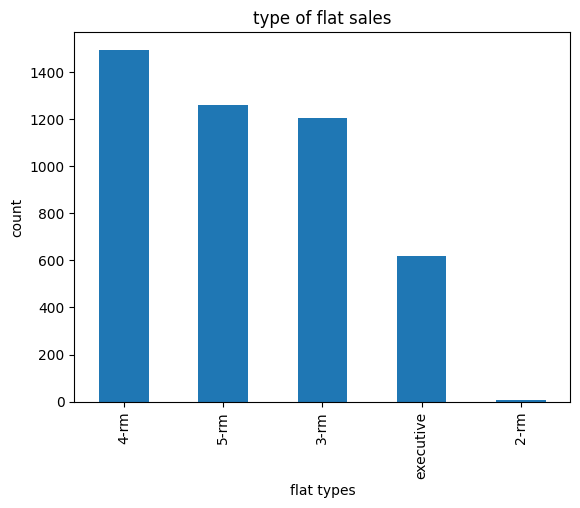

In [ ]:
import matplotlib.pyplot as plt

df['flat_type'].value_counts().plot(kind='bar')
plt.title('type of flat sales')
plt.xlabel('flat types')
plt.ylabel('count')
plt.show()

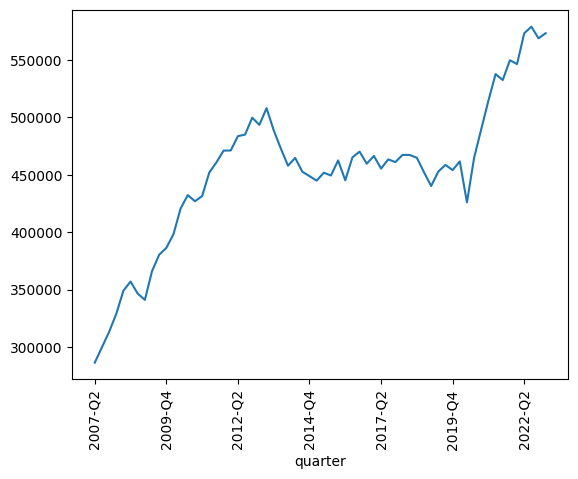

In [ ]:
avg_price = df.groupby('quarter')['price'].agg('mean')
avg_price.plot()
plt.xticks(rotation='vertical')
plt.show()

## Example

1. Load the csv file (number-of-rain-days.csv) containing details on the number of rainy days in a month

In [61]:
r1 = pd.read_csv('number-of-rain-days.csv')
r1

,month,no_of_rainy_days
0,1982-01,10
1,1982-02,5
2,1982-03,11
3,1982-04,14
4,1982-05,10
...,...,...
486,2022-07,16
487,2022-08,15
488,2022-09,14
489,2022-10,27


2. Determine if there is any missing values in the data

In [62]:
r1.isnull().sum()

month               0
no_of_rainy_days    0
dtype: int64

3. Select only records from 2019-01 till now

In [65]:
rf = r1[r1.month >= "2020-01"].copy()
rf

,month,no_of_rainy_days
456,2020-01,6
457,2020-02,8
458,2020-03,8
459,2020-04,12
460,2020-05,16
461,2020-06,21
462,2020-07,22
463,2020-08,12
464,2020-09,18
465,2020-10,16


4. Display the extracted records as a line graph and set the x label to be month

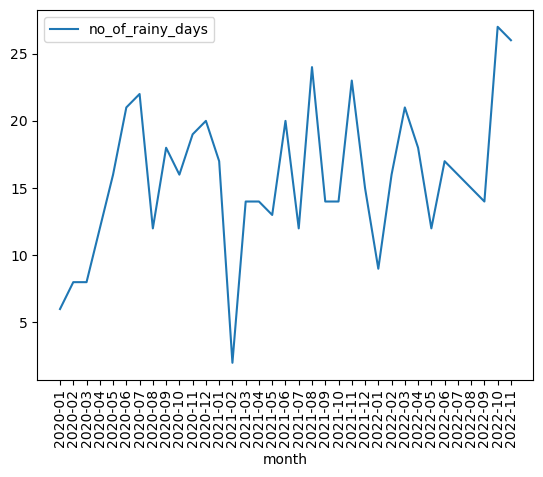

In [66]:
fig, ax = plt.subplots()

rf.plot(ax=ax, xticks=rf.index)
ax.set_xticklabels(rf.month)
plt.xlabel('month')
plt.xticks(rotation='vertical')
plt.show()

# Debugging in Python

Trying to figure out what is wrong with the code or trying to understand how the code works is an important skill. To debug in Jupyter notebook, you use Python's own pdb module

In [71]:
def bad_function(var):
    return var + 0
bad_function("input")

TypeError: can only concatenate str (not "int") to str

The above error indicates a string cannot be concatenated with an integer.
For Python 3.7, use the breakpoint() to debug the code.

* a(rgs) - print the args of the current function (f(args))
* l(ist) - show where in the source code that the next line to execute is 
* w(here) – Print the stack trace
* d(own) – Move the current frame X number of levels down. Defaults to one.
* u(p) – Move the current frame X number of levels up. Defaults to one.
* b(reak) – With a *lineno* argument, set a break point at that line number in the current file / context
* **c(ontinue)** – Continue execution, only stop when a breakpoint is reached
* **n(ext)** - Execute the next line in the current function is reached, or it returns
* **s(tep)** - Execute the current line, stop at te first possible occasion (either in a function that is called or on the next line in the current function
* r(eturn) - Continue until the current functino returns
* **q(uit)** - Exit from the debugging session
* ? - all documented commands

The difference between next and step is that step stops inside a called function, while next executes called functions at (nearly) full speed, only stopping at the next line in the current function.

**Toggle the bug icon** at the top right to enable debugging.

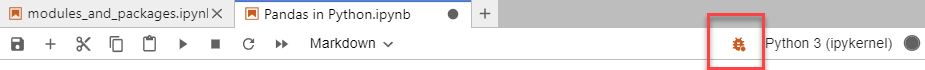

In [72]:
def bad_function(var):
    breakpoint()
    return var + 0
bad_function("input")

--Return--
None
> c:\users\clee1\appdata\local\temp\ipykernel_18840\1136090361.py(5)override_sys_breakpoint()



ipdb>  n


> c:\users\clee1\appdata\local\temp\ipykernel_18840\2977708367.py(3)bad_function()
      1 def bad_function(var):
      2     breakpoint()
----> 3     return var + 0
      4 bad_function("input")



ipdb>  a


var = 'input'


ipdb>  w


    [... skipping 21 hidden frame(s)]

  c:\users\clee1\appdata\local\temp\ipykernel_18840\2977708367.py(4)<module>()
      1 def bad_function(var):
      2     breakpoint()
      3     return var + 0
----> 4 bad_function("input")

> c:\users\clee1\appdata\local\temp\ipykernel_18840\2977708367.py(3)bad_function()
      1 def bad_function(var):
      2     breakpoint()
----> 3     return var + 0
      4 bad_function("input")



ipdb>  q


### JupyterLab debugger front-end
Notebooks, code consoles and files can be debugged from JupyterLab directly. Similarly, toggle the bug icon at the top right to enable debugging.

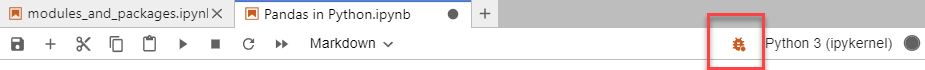

This is only available for kernel that support debugging.

Once debugging is enabled, set the breakpoints where we would be stepping into the code. This can be done by clicking on the gutter on the line we wish to add a breakpoint.

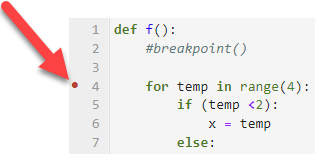

Run the cell/code and the execution should stop at the set breakpoint.

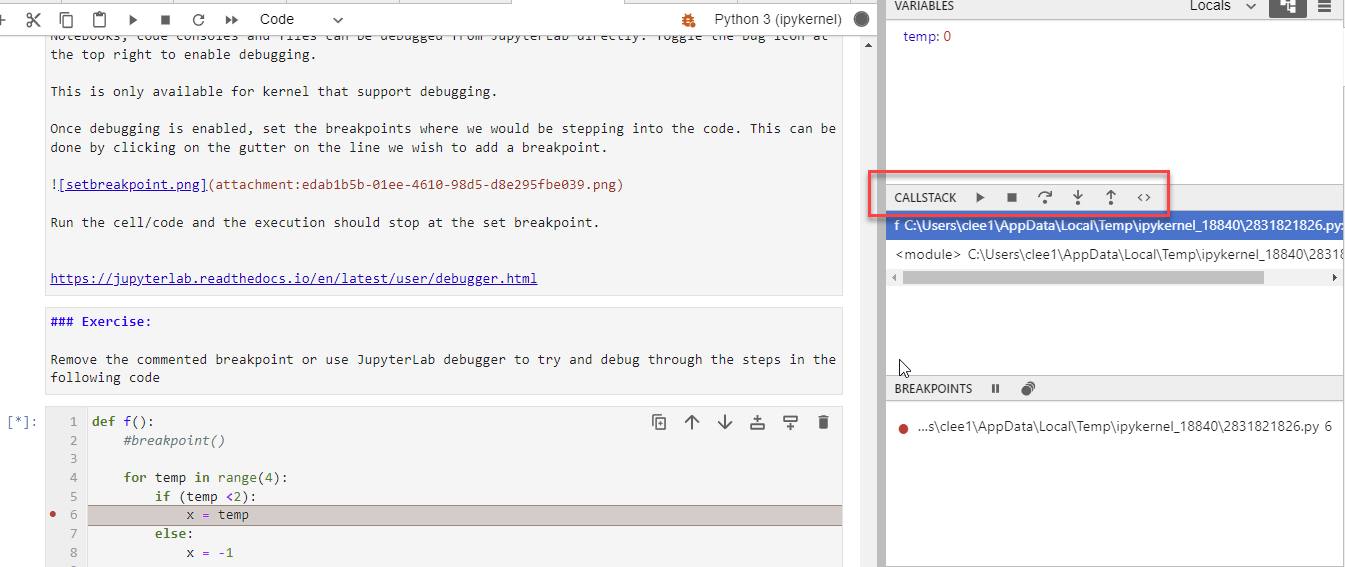

The debugger allows you to observe the variables and also debug actions such as Next (line) and Continue in the Callstack to execute code at your control.

https://jupyterlab.readthedocs.io/en/latest/user/debugger.html

### Exercise: 
    
Remove the commented breakpoint or use JupyterLab debugger to try and debug through the steps in the following code 

In [ ]:
def f():
    #breakpoint()

    for temp in range(4):
        if (temp <2):
            x = temp
        else:
            x = -1
            
x = 0
f()

Code development and data analysis always require a bit of trial and error, and IPython contains tools to streamline this process.
This section will briefly cover some options for controlling Python's exception reporting, followed by exploring tools for debugging errors in code.

## Controlling Exceptions: ``%xmode``

Most of the time when a Python script fails, it will raise an Exception.
When the interpreter hits one of these exceptions, information about the cause of the error can be found in the *traceback*, which can be accessed from within Python.
With the ``%xmode`` magic function, IPython allows you to control the amount of information printed when the exception is raised.
Consider the following code:

In [73]:
def func1(a, b):
    return a / b

def func2(x):
    a = x
    b = x - 1
    return func1(a, b)

In [74]:
func2(1)

ZeroDivisionError: division by zero

Calling ``func2`` results in an error, and reading the printed trace lets us see exactly what happened.
By default, this trace includes several lines showing the context of each step that led to the error.
Using the ``%xmode`` magic function (short for *Exception mode*), we can change what information is printed.

``%xmode`` takes a single argument, the mode, and there are three possibilities: ``Plain``, ``Context``, and ``Verbose``.
The default is ``Context``, and gives output like that just shown before.
``Plain`` is more compact and gives less information:

In [75]:
%xmode Plain

Exception reporting mode: Plain


In [76]:
func2(1)

ZeroDivisionError: division by zero

The ``Verbose`` mode adds some extra information, including the arguments to any functions that are called:

In [77]:
%xmode Verbose

Exception reporting mode: Verbose


In [78]:
func2(1)

ZeroDivisionError: division by zero

This extra information can help narrow-in on why the exception is being raised.
So why not use the ``Verbose`` mode all the time?
As code gets complicated, this kind of traceback can get extremely long.
Depending on the context, sometimes the brevity of ``Default`` mode is easier to work with.